In [78]:
import random
import glob
from multiprocessing import Pool

import skimage.io
import numpy as np
import matplotlib.pyplot as plt

from keras.models import model_from_json

%matplotlib inline

MERGIN=30
FIX=20

In [73]:
with open("picture_fix.json", "r") as inp:
    model = model_from_json(inp.read())
model.load_weights("picture_fix.h5")

In [34]:
IMAGE_WIDTH=MERGIN * 2 + FIX

In [3]:
def RandomCrop(mat, width, height):    
    img_height = mat.shape[0]
    img_width  = mat.shape[1]

    max_height = img_height - height
    max_width  = img_width - width
    
    r = random.randint(0, max_height)
    c = random.randint(0, max_width)
    
    return mat[r:r+height, c:c+width]

def CropToCenter(mat, width, height):
    img_height = mat.shape[0]
    img_width  = mat.shape[1]
    r = (img_height - height) // 2
    c = (img_width - width) // 2
    return mat[r:r+height, c:c+width]

def RemoveCenterAndFlatten(mat, width, height):
    mask = np.zeros(mat.shape[:-1])
    mask.fill(1.)
    img_height = mat.shape[0]
    img_width  = mat.shape[1]
    r = (img_height - height) // 2
    c = (img_width - width) // 2
    mask[r:r+height, c:c+width] = -1.
    
    return np.reshape(mat[mask >= 0], (-1, mat.shape[-1]))

(5, 5, 3)


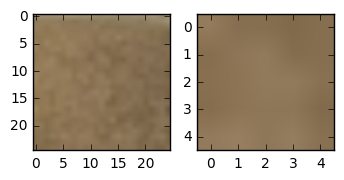

In [76]:
mat = skimage.io.imread('data/fixer_source/_DSC3018.jpg')
mat = RandomCrop(mat, IMAGE_WIDTH, IMAGE_WIDTH)
center_mat = CropToCenter(mat, FIX, FIX)
print(center_mat.shape)
# d, arr = plt.subplots(2)
plt.subplot(131).imshow(mat)
plt.subplot(132).imshow(center_mat)

vector = RemoveCenterAndFlatten(mat, FIX, FIX)
vector = np.reshape(vector, (-1,))

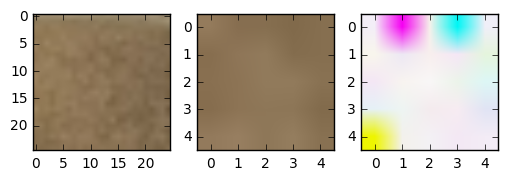

In [77]:
pic = model.predict(np.array([vector]))
pic = np.reshape(pic[0], (5, 5, 3))
plt.subplot(131).imshow(mat)
plt.subplot(132).imshow(center_mat)
plt.subplot(133).imshow(pic)

array([[[ 0.95066547,  0.93246949,  0.97102517],
        [ 0.95865178,  0.        ,  0.9531495 ],
        [ 0.96315974,  0.94150954,  0.9277882 ],
        [ 0.        ,  0.96512753,  0.95887345],
        [ 0.93773896,  0.94497216,  0.97709811]],

       [[ 0.97831631,  0.96251923,  0.93302834],
        [ 0.93727112,  0.92078751,  0.95524031],
        [ 0.97128147,  0.9390651 ,  0.93290353],
        [ 0.96206081,  0.9053911 ,  0.969504  ],
        [ 0.89589208,  0.95949626,  0.88313293]],

       [[ 0.95819366,  0.90556169,  0.95985055],
        [ 0.96908557,  0.95503247,  0.94503957],
        [ 0.97757596,  0.96672505,  0.96822196],
        [ 0.92915827,  0.95821881,  0.9190293 ],
        [ 0.86411023,  0.96411109,  0.95883989]],

       [[ 0.90515655,  0.9449271 ,  0.97430545],
        [ 0.92628413,  0.95699239,  0.95539254],
        [ 0.95275903,  0.93135303,  0.92900318],
        [ 0.96807265,  0.93613857,  0.95507377],
        [ 0.90908486,  0.89653778,  0.9604528 ]],

       [[ 0.

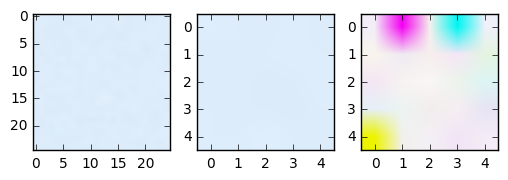

In [74]:
pic = model.predict(np.array([vector]))
pic = np.reshape(pic[0], (5, 5, 3))
plt.subplot(131).imshow(mat)
plt.subplot(132).imshow(center_mat)
plt.subplot(133).imshow(pic)
pic